# Predict Diabetes Mellitus

This analysis aims to determine whether a patient admitted to an ICU has been diagnosed with a particular type of diabetes, Diabetes Mellitus. 

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib  
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn
%matplotlib inline

# Read data 

In [2]:
# read data set
df =pd.read_csv('/Users/path/Desktop/TrainingWiDS2021.csv')
df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
# list of variables and data types
df.shape

(130157, 181)

- 181 variables 
- 130,157 rows

In [4]:
df.dtypes

Unnamed: 0                       int64
encounter_id                     int64
hospital_id                      int64
age                            float64
bmi                            float64
                                ...   
immunosuppression                int64
leukemia                         int64
lymphoma                         int64
solid_tumor_with_metastasis      int64
diabetes_mellitus                int64
Length: 181, dtype: object

In [5]:
df.describe()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,...,16760.000000,16760.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,65079.000000,213000.856519,106.102131,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,...,247.525419,239.617358,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,37573.233831,38109.828146,63.482277,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,...,131.440167,128.562211,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,1.000000,147000.000000,1.000000,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250000,0.0,...,42.000000,38.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32540.000000,180001.000000,49.000000,52.000000,23.598006,0.000000,162.500000,427.000000,0.045833,0.0,...,144.000000,138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65079.000000,213014.000000,112.000000,64.000000,27.564749,0.000000,170.100000,653.000000,0.155556,0.0,...,228.125000,218.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97618.000000,246002.000000,165.000000,75.000000,32.803127,0.000000,177.800000,969.000000,0.423611,0.0,...,333.000000,324.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,130157.000000,279000.000000,204.000000,89.000000,67.814990,1.000000,195.590000,1111.000000,175.627778,0.0,...,720.000000,654.813793,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['diabetes_mellitus'].value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

0    78.371505
1    21.628495
Name: diabetes_mellitus, dtype: float64

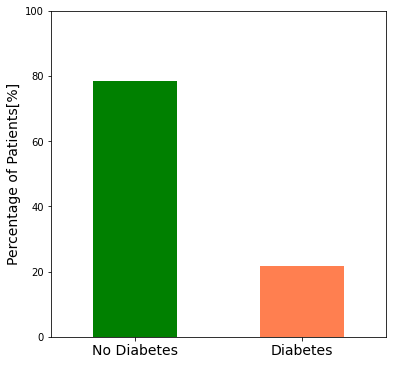

In [7]:
# visualise class distribution

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
(df['diabetes_mellitus'].value_counts(normalize=True)*100).plot(kind='bar', color=['green', 'coral'])
display(df['diabetes_mellitus'].value_counts(normalize=True)*100)
ax.set_ylim([0, 100])
ax.set_ylabel('Percentage of Patients[%]', fontsize=14)
ax.set_xticklabels(['No Diabetes', 'Diabetes'], fontsize=14, rotation=0)
plt.show()

1 accounts for 21.63% of the diabetes_mellitus column. We have an imbalanced dataset

# Check missing values 

# Remove variables with missing values % >=30%


In [8]:
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
missing_values.head(100)
x = missing_values.reset_index()
x.columns = ['variable', 'num_of_missing_values'] 
x
x['percent_of_missing_values'] = x['num_of_missing_values']/len(df)

In [9]:
x['percent_of_missing_values'] = x['percent_of_missing_values'].round(2) 

In [10]:
x.head(15)

,variable,num_of_missing_values,percent_of_missing_values
0,h1_bilirubin_max,119861,0.92
1,h1_bilirubin_min,119861,0.92
2,h1_albumin_max,119005,0.91
3,h1_albumin_min,119005,0.91
4,h1_lactate_min,118467,0.91
5,h1_lactate_max,118467,0.91
6,h1_pao2fio2ratio_max,113397,0.87
7,h1_pao2fio2ratio_min,113397,0.87
8,h1_arterial_ph_max,107849,0.83
9,h1_arterial_ph_min,107849,0.83


<AxesSubplot:xlabel='variable'>

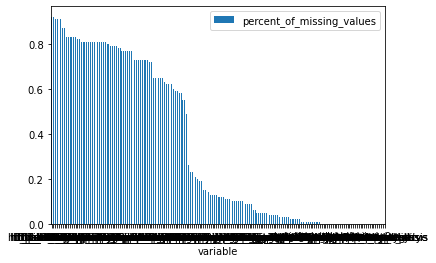

In [11]:
# Visualise percentage of missing values by variable
x.plot.bar(x='variable', y='percent_of_missing_values', rot=0)

##  Remove variable with percentage of missing values >=30%

In [12]:
x['decision'] = np.where(x['percent_of_missing_values']>=0.30, 'Remove', 'Keep')
x = x[x['decision']=='Keep']
variables_list = x['variable'].tolist()
len(variables_list)  

107

107 variables out of 181 have missing values <30%. We keep these columns

In [13]:
df_1 = df[variables_list]
df_1.shape

(130157, 107)

Remaining : 107 variables  130,157 rows

## Visualise missing values

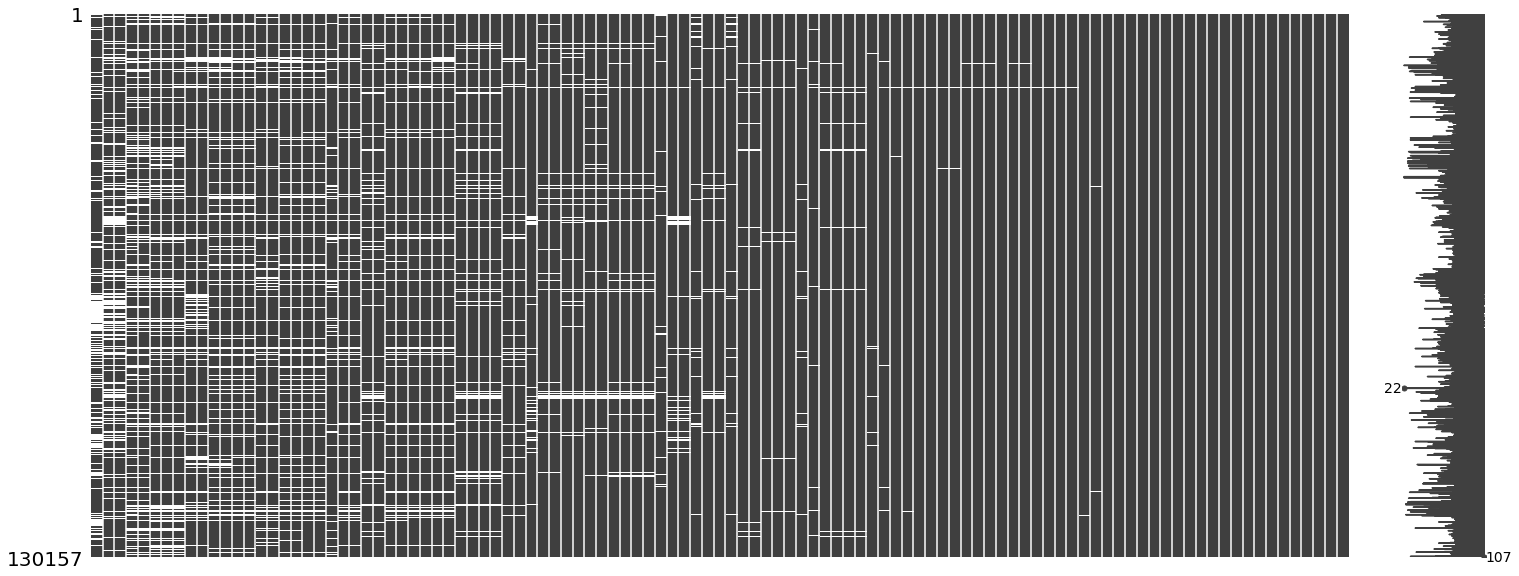

In [14]:
import missingno as msno
msno.matrix(df_1)
plt.show()

# Impute missing values by datatype

In [15]:
df_1.shape

(130157, 107)

In [16]:
# group variables by datatype
df_1.columns.to_series().groupby(df.dtypes).groups

{int64: ['leukemia', 'immunosuppression', 'cirrhosis', 'lymphoma', 'aids', 'solid_tumor_with_metastasis', 'hepatic_failure', 'Unnamed: 0', 'encounter_id', 'ventilated_apache', 'intubated_apache', 'arf_apache', 'apache_post_operative', 'readmission_status', 'icu_id', 'elective_surgery', 'hospital_id', 'diabetes_mellitus'], float64: ['h1_temp_min', 'h1_temp_max', 'wbc_apache', 'hematocrit_apache', 'bun_apache', 'creatinine_apache', 'sodium_apache', 'd1_hco3_min', 'd1_hco3_max', 'd1_platelets_min', 'd1_platelets_max', 'd1_wbc_min', 'd1_wbc_max', 'd1_calcium_min', 'd1_calcium_max', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_min', 'd1_hematocrit_max', 'glucose_apache', 'd1_bun_min', 'd1_bun_max', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_sodium_min', 'd1_sodium_max', 'd1_potassium_min', 'd1_potassium_max', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_sysbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'd1

In [17]:
numerical_variables = [c for c in df_1.columns if df_1[c].dtype in ['float64']]
len(numerical_variables)

83

In [18]:
binary_variables = [c for c in df_1.columns if df_1[c].dtype in ['int64']]
len(binary_variables)

18

In [19]:
categorical_variables = [c for c in df_1.columns if df_1[c].dtype in ['object']]
len(categorical_variables)

6

In [20]:
ids = df[['hospital_id','icu_id','encounter_id']]
ids

,hospital_id,icu_id,encounter_id
0,118,92,214826
1,81,90,246060
2,118,93,276985
3,118,92,262220
4,33,91,201746
...,...,...,...
130152,7,1109,164758
130153,7,1106,197653
130154,7,1104,219719
130155,170,1108,222562


# Perform imputation

### 1. Impute numerical values

In [21]:
# create df with numerical variables only and impute with missing values
numerical = df_1[numerical_variables]
numerical=numerical.fillna(numerical.mean())

### 2. Impute binary values

In [22]:
binary = df_1[binary_variables]
binary = binary.drop(['hospital_id','icu_id','encounter_id'], axis=1)
binary = binary.apply(lambda x:x.fillna(x.value_counts().index[0]))

### 3. Impute categorical values

In [23]:
categorical = df_1[categorical_variables]
categorical = categorical.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Combine all imputed variables in single data set

In [24]:
# Combine all imputed data
merged = pd.concat([ids, numerical,binary , categorical], axis=1)

In [25]:
merged.shape

(130157, 107)

In [26]:
# check there are no missing values
merged.isnull().sum()

hospital_id         0
icu_id              0
encounter_id        0
h1_temp_min         0
h1_temp_max         0
                   ..
ethnicity           0
icu_admit_source    0
gender              0
icu_type            0
icu_stay_type       0
Length: 107, dtype: int64

In [27]:
merged = merged.drop(['Unnamed: 0'], axis=1)

# Feature Engineering

In [28]:
# Edited from https://www.kaggle.com/jayjay75/3rd-place-nn-wids2020?scriptVersionId=29209297

# comorbidity_score
merged['comorbidity_score'] = merged['aids'] * 23 + merged['cirrhosis'] * 4 + merged['hepatic_failure'] * 16 + merged['immunosuppression'] * 10 + merged['leukemia'] * 10 + merged['lymphoma'] * 13 + merged['solid_tumor_with_metastasis'] * 11
merged['comorbidity_score'] = merged['comorbidity_score'].fillna(0)

merged["total_chronic"] = merged[["aids", "cirrhosis", 'hepatic_failure']].sum(axis=1)

#GCS
merged['gcs_eyes_apache'] = merged['gcs_eyes_apache'].fillna(4)
merged['gcs_verbal_apache'] = merged['gcs_verbal_apache'].fillna(5)
merged['gcs_motor_apache'] = merged['gcs_motor_apache'].fillna(6)

merged['gcs_score'] = merged[['gcs_eyes_apache', 'gcs_motor_apache','gcs_verbal_apache']].sum(axis=1)
merged['gcs_score_type'] = merged.gcs_score.apply(lambda x: 2.5 * (round(int(x)/2.5))).divide(2.5)

gcs_cols = ['gcs_eyes_apache', 'gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache']

merged.drop(gcs_cols, axis=1, inplace=True)

merged.head()


,hospital_id,icu_id,encounter_id,h1_temp_min,h1_temp_max,wbc_apache,hematocrit_apache,bun_apache,creatinine_apache,sodium_apache,...,hospital_admit_source,ethnicity,icu_admit_source,gender,icu_type,icu_stay_type,comorbidity_score,total_chronic,gcs_score,gcs_score_type
0,118,92,214826,37.500000,39.500000,14.100000,27.400000,31.00000,2.510000,134.00000,...,Floor,Caucasian,Floor,M,CTICU,admit,0,0,13.000000,5.0
1,81,90,246060,36.300000,36.300000,12.700000,36.900000,9.00000,0.560000,145.00000,...,Floor,Caucasian,Floor,F,Med-Surg ICU,admit,0,0,5.000000,2.0
2,118,93,276985,36.700000,36.700000,12.187662,32.975817,25.71807,1.481629,137.94526,...,Emergency Department,Caucasian,Accident & Emergency,F,Med-Surg ICU,admit,0,0,14.000000,6.0
3,118,92,262220,34.800000,35.600000,8.000000,25.900000,25.71807,1.481629,137.94526,...,Operating Room,Caucasian,Operating Room / Recovery,F,CTICU,admit,0,0,15.000000,6.0
4,33,91,201746,36.613964,36.722597,12.187662,32.975817,25.71807,1.481629,137.94526,...,Emergency Department,Caucasian,Accident & Emergency,M,Med-Surg ICU,admit,0,0,13.003321,5.0


# Identify relationships between explanatory variables and target variable

## 1. Numerical variables analysis

In [29]:
#Remove unrealistic age 

merged['age']= merged[merged['age'] != 0]
merged['age'] = merged[merged['age'] < 130]

In [30]:
cols = ['comorbidity_score', 'total_chronic']

merged[cols] = merged[cols].astype('float64')

In [31]:
numerical_1 = [c for c in merged.columns if merged[c].dtype in ['float64']]
numerical_df = merged[numerical_1]

In [32]:
numerical_df.shape

(130157, 82)

82 numerical variables

# Boxplots

In [33]:
features = merged[numerical_1].columns.tolist()

In [34]:
list(enumerate(features))

[(0, 'h1_temp_min'),
 (1, 'h1_temp_max'),
 (2, 'wbc_apache'),
 (3, 'hematocrit_apache'),
 (4, 'bun_apache'),
 (5, 'creatinine_apache'),
 (6, 'sodium_apache'),
 (7, 'd1_hco3_min'),
 (8, 'd1_hco3_max'),
 (9, 'd1_platelets_min'),
 (10, 'd1_platelets_max'),
 (11, 'd1_wbc_min'),
 (12, 'd1_wbc_max'),
 (13, 'd1_calcium_min'),
 (14, 'd1_calcium_max'),
 (15, 'd1_hemaglobin_max'),
 (16, 'd1_hemaglobin_min'),
 (17, 'd1_hematocrit_min'),
 (18, 'd1_hematocrit_max'),
 (19, 'glucose_apache'),
 (20, 'd1_bun_min'),
 (21, 'd1_bun_max'),
 (22, 'h1_mbp_noninvasive_max'),
 (23, 'h1_mbp_noninvasive_min'),
 (24, 'd1_creatinine_max'),
 (25, 'd1_creatinine_min'),
 (26, 'd1_sodium_min'),
 (27, 'd1_sodium_max'),
 (28, 'd1_potassium_min'),
 (29, 'd1_potassium_max'),
 (30, 'h1_diasbp_noninvasive_max'),
 (31, 'h1_diasbp_noninvasive_min'),
 (32, 'h1_sysbp_noninvasive_min'),
 (33, 'h1_sysbp_noninvasive_max'),
 (34, 'd1_glucose_max'),
 (35, 'd1_glucose_min'),
 (36, 'temp_apache'),
 (37, 'h1_mbp_max'),
 (38, 'h1_mbp_mi

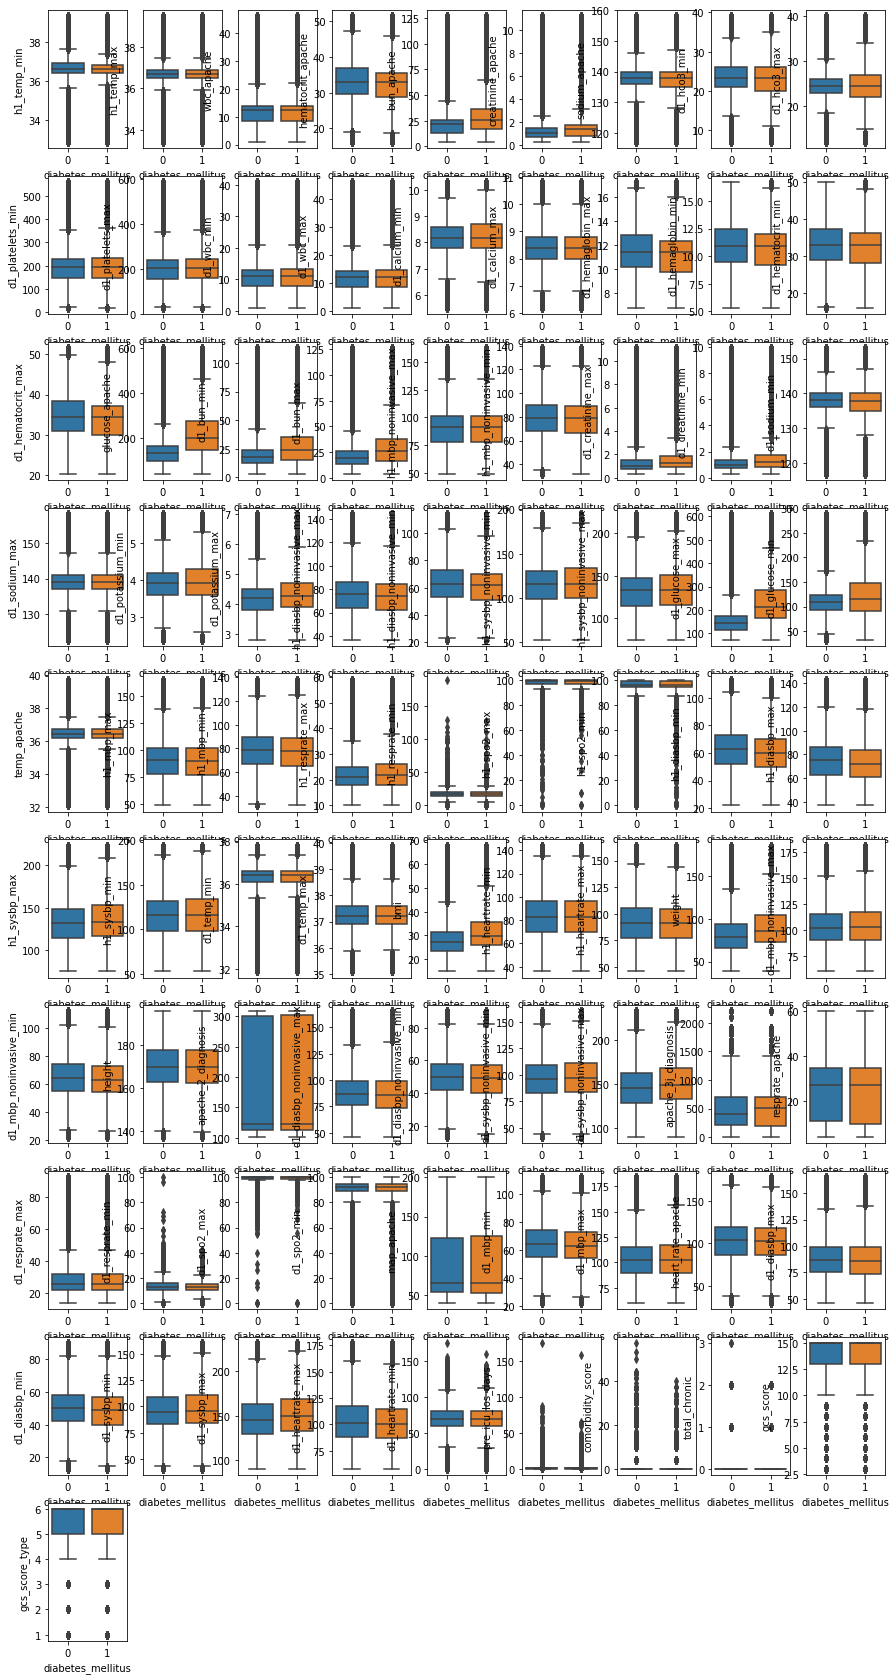

In [35]:
plt.figure(figsize = (15,30))
for i in enumerate(features):
    plt.subplot(10,9,i[0]+1)
    sns.boxplot(x="diabetes_mellitus", y=i[1],  data=merged)

We can notice that some variables have the same distribution as diabetes_mellitus. This means these variables do not have predictive power and can be removed.

In [36]:
# remove numerical variables with same distribution as diabetes mellitus
df_clean = merged[['hematocrit_apache','bun_apache','creatinine_apache','d1_hemaglobin_max','d1_hematocrit_min','glucose_apache','d1_bun_max','d1_bun_min','d1_creatinine_min','d1_potassium_max','d1_glucose_max','d1_glucose_min','h1_diasbp_min','age','bmi','weight','d1_sysbp_noninvasive_max','apache_3j_diagnosis','d1_spo2_max','pre_icu_los_days', 'comorbidity_score', 'total_chronic', 'gcs_score', 'gcs_score_type']]

In [37]:
df_clean.shape

(130157, 24)

## Analyse the remaining 24 numerical variables

In [38]:
features_1 = df_clean.columns.tolist()

In [39]:
list(enumerate(features_1))

[(0, 'hematocrit_apache'),
 (1, 'bun_apache'),
 (2, 'creatinine_apache'),
 (3, 'd1_hemaglobin_max'),
 (4, 'd1_hematocrit_min'),
 (5, 'glucose_apache'),
 (6, 'd1_bun_max'),
 (7, 'd1_bun_min'),
 (8, 'd1_creatinine_min'),
 (9, 'd1_potassium_max'),
 (10, 'd1_glucose_max'),
 (11, 'd1_glucose_min'),
 (12, 'h1_diasbp_min'),
 (13, 'age'),
 (14, 'bmi'),
 (15, 'weight'),
 (16, 'd1_sysbp_noninvasive_max'),
 (17, 'apache_3j_diagnosis'),
 (18, 'd1_spo2_max'),
 (19, 'pre_icu_los_days'),
 (20, 'comorbidity_score'),
 (21, 'total_chronic'),
 (22, 'gcs_score'),
 (23, 'gcs_score_type')]

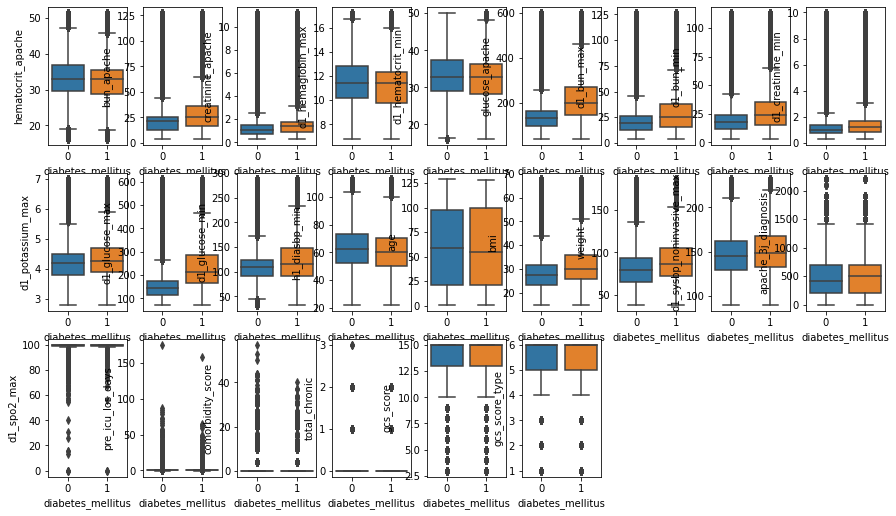

In [40]:
plt.figure(figsize = (15,30))
for i in enumerate(features_1):
    plt.subplot(10,9,i[0]+1)
    sns.boxplot(x="diabetes_mellitus", y=i[1],  data=merged)

In [41]:
df_clean.head()

,hematocrit_apache,bun_apache,creatinine_apache,d1_hemaglobin_max,d1_hematocrit_min,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_min,d1_potassium_max,...,bmi,weight,d1_sysbp_noninvasive_max,apache_3j_diagnosis,d1_spo2_max,pre_icu_los_days,comorbidity_score,total_chronic,gcs_score,gcs_score_type
0,27.400000,31.00000,2.510000,8.90000,27.400000,168.000000,31.000000,30.000000,2.230000,4.000000,...,22.732803,73.900000,131.0,502.01,100.0,0.541667,0.0,0.0,13.000000,5.0
1,36.900000,9.00000,0.560000,11.30000,36.100000,145.000000,11.000000,9.000000,0.560000,4.200000,...,27.421875,70.200000,159.0,203.01,100.0,0.927778,0.0,0.0,5.000000,2.0
2,32.975817,25.71807,1.481629,11.45981,32.939299,160.141416,25.578808,23.554154,1.363795,4.253053,...,31.952749,95.300000,148.0,703.03,98.0,0.000694,0.0,0.0,14.000000,6.0
3,25.900000,25.71807,1.481629,11.60000,25.900000,185.000000,25.578808,23.554154,1.363795,5.000000,...,22.635548,61.700000,158.0,1206.03,100.0,0.000694,0.0,0.0,15.000000,6.0
4,32.975817,25.71807,1.481629,11.45981,32.939299,160.141416,25.578808,23.554154,1.363795,4.253053,...,29.110260,83.791104,147.0,601.01,100.0,0.073611,0.0,0.0,13.003321,5.0


- 2 variables have outliers and we can't see clearly their distributions 
- We will create histogram for them: `d1_spo2_max`, `pre_icu_los_days`

### Create histogram for d1_spo2_max and pre_icu_los_days

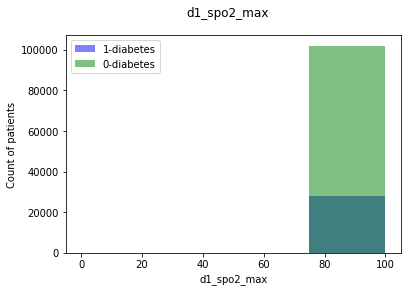

In [42]:
fig, ax = plt.subplots()

ax.hist(merged[merged["diabetes_mellitus"]==1]["d1_spo2_max"], bins=4, alpha=0.5, color="blue", label="1-diabetes")
ax.hist(merged[merged["diabetes_mellitus"]==0]["d1_spo2_max"], bins=4, alpha=0.5, color="green", label="0-diabetes")

ax.set_xlabel("d1_spo2_max")
ax.set_ylabel("Count of patients")

fig.suptitle("d1_spo2_max")

ax.legend()

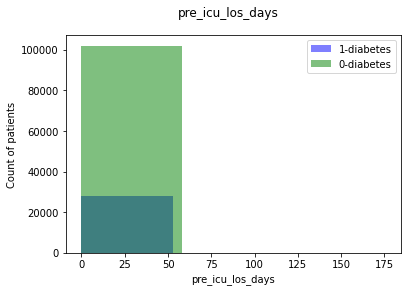

In [43]:
fig, ax = plt.subplots()

ax.hist(merged[merged["diabetes_mellitus"]==1]["pre_icu_los_days"], bins=3, alpha=0.5, color="blue", label="1-diabetes")
ax.hist(merged[merged["diabetes_mellitus"]==0]["pre_icu_los_days"], bins=3, alpha=0.5, color="green", label="0-diabetes")

ax.set_xlabel("pre_icu_los_days")
ax.set_ylabel("Count of patients")

fig.suptitle("pre_icu_los_days")

ax.legend()

-  Based on the above distributions, it seems that there is an effect of the imbalanced data set, but not a clear differentiation between values when diabetes = 1 vs. diabetes = 0. Therefore we will disgard these variables too

In [44]:
# remove variables gcs_motor_apache','gcs_unable_apache','d1_spo2_max','pre_icu_los_days

df_clean_1 = df_clean.drop(['d1_spo2_max','pre_icu_los_days'], axis=1)
df_clean_1

,hematocrit_apache,bun_apache,creatinine_apache,d1_hemaglobin_max,d1_hematocrit_min,glucose_apache,d1_bun_max,d1_bun_min,d1_creatinine_min,d1_potassium_max,...,h1_diasbp_min,age,bmi,weight,d1_sysbp_noninvasive_max,apache_3j_diagnosis,comorbidity_score,total_chronic,gcs_score,gcs_score_type
0,27.400000,31.00000,2.510000,8.90000,27.400000,168.000000,31.000000,30.000000,2.230000,4.000000,...,63.0,118.0,22.732803,73.900000,131.0,502.01,0.0,0.0,13.000000,5.0
1,36.900000,9.00000,0.560000,11.30000,36.100000,145.000000,11.000000,9.000000,0.560000,4.200000,...,48.0,81.0,27.421875,70.200000,159.0,203.01,0.0,0.0,5.000000,2.0
2,32.975817,25.71807,1.481629,11.45981,32.939299,160.141416,25.578808,23.554154,1.363795,4.253053,...,58.0,118.0,31.952749,95.300000,148.0,703.03,0.0,0.0,14.000000,6.0
3,25.900000,25.71807,1.481629,11.60000,25.900000,185.000000,25.578808,23.554154,1.363795,5.000000,...,44.0,118.0,22.635548,61.700000,158.0,1206.03,0.0,0.0,15.000000,6.0
4,32.975817,25.71807,1.481629,11.45981,32.939299,160.141416,25.578808,23.554154,1.363795,4.253053,...,68.0,33.0,29.110260,83.791104,147.0,601.01,0.0,0.0,13.003321,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,32.975817,25.71807,1.481629,11.45981,32.939299,160.141416,25.578808,23.554154,1.363795,4.253053,...,82.0,7.0,29.287256,90.000000,161.0,104.01,0.0,0.0,15.000000,6.0
130153,39.000000,32.00000,1.070000,13.60000,39.000000,139.000000,32.000000,32.000000,1.070000,3.600000,...,81.0,7.0,29.653433,78.400000,164.0,207.01,0.0,0.0,14.000000,6.0
130154,32.975817,30.00000,2.430000,11.00000,31.000000,346.000000,31.000000,30.000000,2.410000,4.400000,...,70.0,7.0,32.265371,102.000000,156.0,102.01,0.0,0.0,3.000000,1.0
130155,32.000000,25.71807,1.481629,10.90000,23.000000,137.000000,45.000000,45.000000,2.210000,5.700000,...,47.0,NaN,24.408579,83.900000,151.0,306.01,0.0,0.0,15.000000,6.0


In [45]:
df_clean_1.shape

(130157, 22)

- 22 remaining variables

### Check for multicolinearity.  Remove variables with strong correlation > 0.8

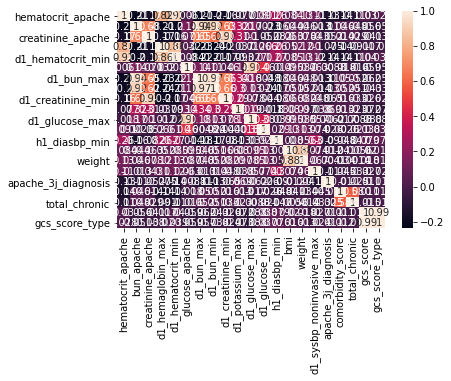

In [46]:
# correlation matrix 
corrMatrix = df_clean_1.corr()
sns.heatmap(corrMatrix, annot=True)    
plt.show()

In [47]:
# correlation matrix 
cor_matrix = df_clean_1.corr().abs()
# upper
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# list columns with correlation more than 0.8 in order to drop them
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
# drop variables with correlation more than 0.8
numerical_clean = df_clean_1.drop(to_drop, axis=1)

In [48]:
numerical_clean.shape

(130157, 14)

- 14 remaining variables

## 2. Categorical Variables Analysis

In [49]:
# transform icu_id and hospital_id variable type from int to object 
merged['icu_id'] = merged.icu_id.astype('object')
merged['hospital_id'] = merged.hospital_id.astype('object')
merged.dtypes

hospital_id           object
icu_id                object
encounter_id           int64
h1_temp_min          float64
h1_temp_max          float64
                      ...   
icu_stay_type         object
comorbidity_score    float64
total_chronic        float64
gcs_score            float64
gcs_score_type       float64
Length: 106, dtype: object

In [50]:
#create data set with categorical variables
cat_merged = merged.select_dtypes(include = ['object']).copy()
cat_merged.head()

,hospital_id,icu_id,age,hospital_admit_source,ethnicity,icu_admit_source,gender,icu_type,icu_stay_type
0,118,92,118.0,Floor,Caucasian,Floor,M,CTICU,admit
1,81,90,81.0,Floor,Caucasian,Floor,F,Med-Surg ICU,admit
2,118,93,118.0,Emergency Department,Caucasian,Accident & Emergency,F,Med-Surg ICU,admit
3,118,92,118.0,Operating Room,Caucasian,Operating Room / Recovery,F,CTICU,admit
4,33,91,33.0,Emergency Department,Caucasian,Accident & Emergency,M,Med-Surg ICU,admit


In [51]:
# check number of unique labels in each category

cat_merged.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

hospital_id              204
icu_id                   328
age                      129
hospital_admit_source     15
ethnicity                  6
icu_admit_source           5
gender                     2
icu_type                   8
icu_stay_type              3
dtype: int64

<Figure size 360x504 with 0 Axes>

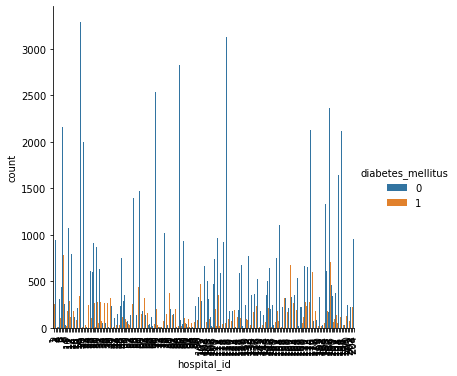

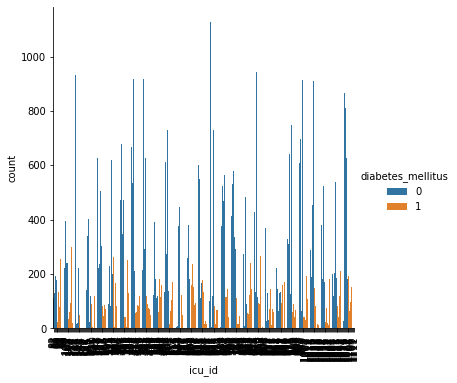

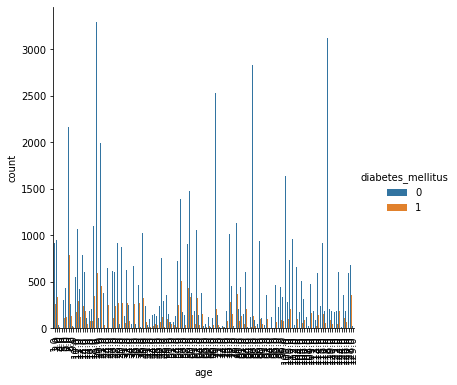

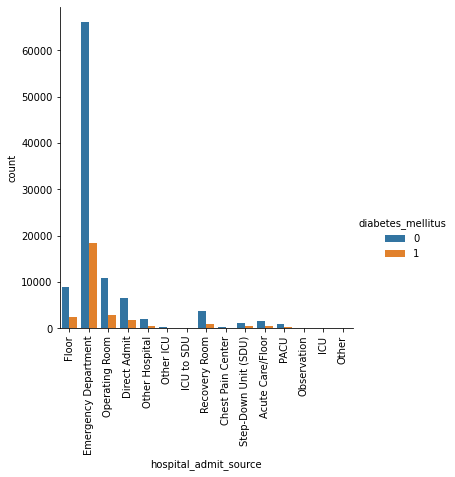

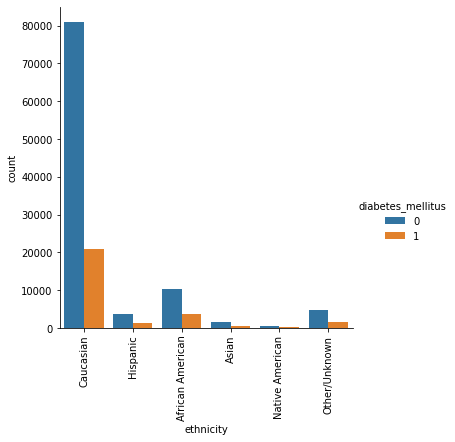

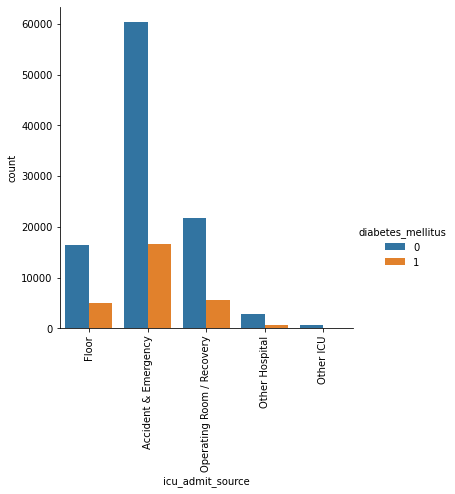

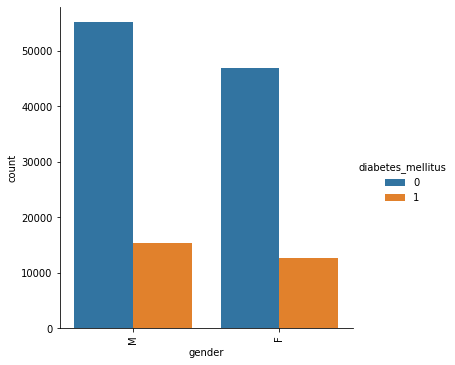

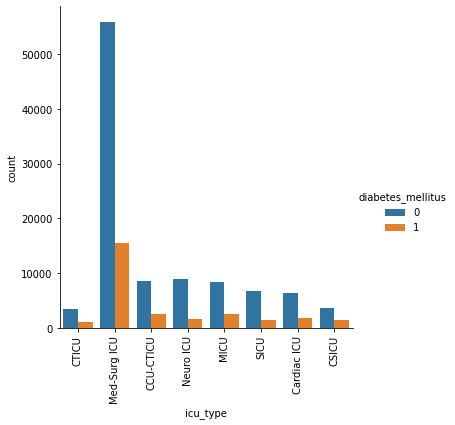

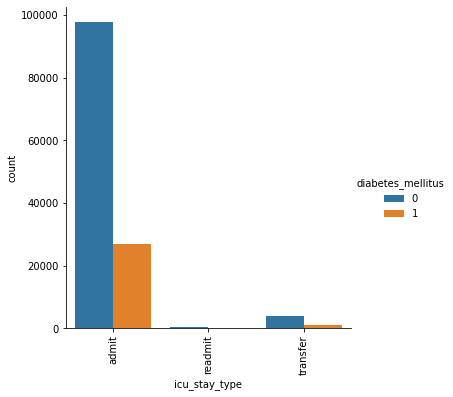

In [52]:
# plot count of labels for each variable

fig = plt.figure(figsize=(5, 7))
for col in cat_merged:
        t = sns.catplot(data = merged, x = col, hue = 'diabetes_mellitus', kind = 'count')
        t.set_xticklabels(rotation=90)
        plt.show()
    

Across the 7 variables, there is a number of labels which are less frequent.
Next we are looking to group these less frequent labels in a unique label `rare_labels` .

Text(0, 0.5, 'Number of labels')

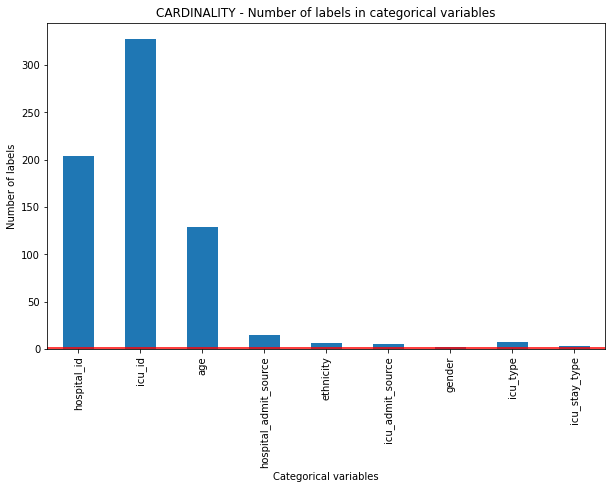

In [53]:
# plot number of labels per categorical variable

fig = cat_merged.nunique().plot.bar(figsize=(10,6))
# plot a threshold of categories that has only one sub-category
fig.axhline(y=1, color='red')
plt.title('CARDINALITY - Number of labels in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of labels')

### Reduce Cardinality

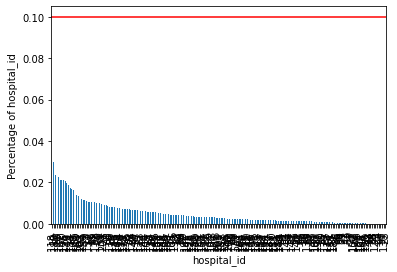

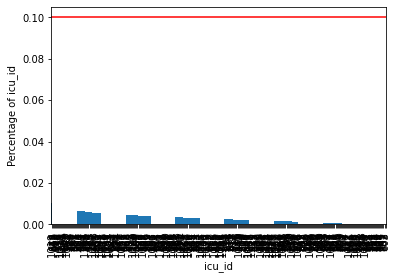

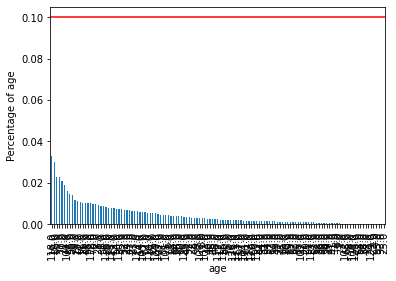

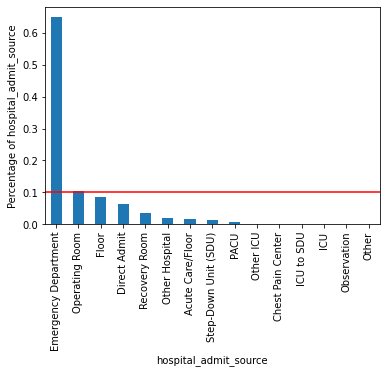

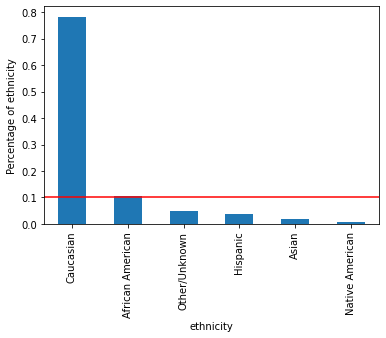

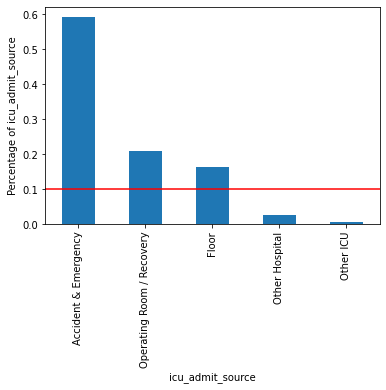

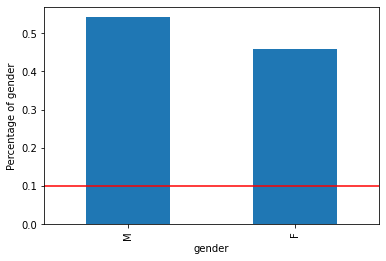

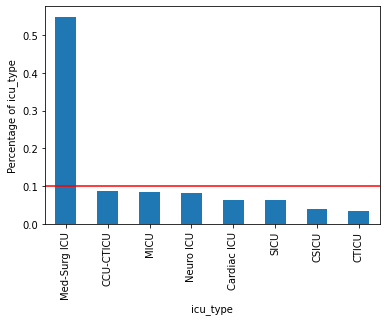

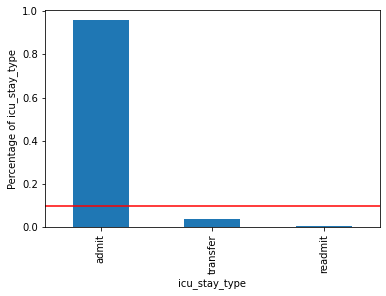

In [54]:
# reduce cardinality

total_labels = len(cat_merged)

for col in cat_merged:
    # calculate how many times a label is repeated in the whole dataset
    df = pd.Series(cat_merged[col].value_counts() / total_labels)
    
    # plot percentages
    fig = df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare labels
    fig.axhline(y=0.10, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()



### Group rare labels in a single label

In [55]:
def group_rare_labels(df, var, tresh):

    total_obs = len(df)

    # find % of obs for each category
    temp_df = pd.Series(df[var].value_counts() / total_obs)

    # create a dictionary to replace the rare labels with string 'rare' if they are present in less than 5% of obs
    grouping_dict = {
        k: ('rare_label' if k not in temp_df[temp_df >= tresh].index else k)
        for k in temp_df.index
    }

    # replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [56]:
def group_rares(df):
    temp = df.copy()
    for col in df:
        temp[col] = group_rare_labels(temp, col, 0.10)
    return temp

In [57]:
group_rare = group_rares(cat_merged)

In [58]:
group_rare.head()

,hospital_id,icu_id,age,hospital_admit_source,ethnicity,icu_admit_source,gender,icu_type,icu_stay_type
0,rare_label,rare_label,rare_label,rare_label,Caucasian,Floor,M,rare_label,admit
1,rare_label,rare_label,rare_label,rare_label,Caucasian,Floor,F,Med-Surg ICU,admit
2,rare_label,rare_label,rare_label,Emergency Department,Caucasian,Accident & Emergency,F,Med-Surg ICU,admit
3,rare_label,rare_label,rare_label,Operating Room,Caucasian,Operating Room / Recovery,F,rare_label,admit
4,rare_label,rare_label,rare_label,Emergency Department,Caucasian,Accident & Emergency,M,Med-Surg ICU,admit


Text(0, 0.5, 'Number of labels per category')

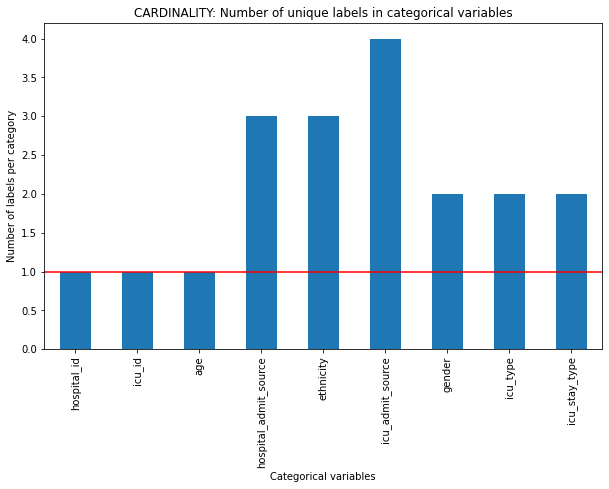

In [59]:
# plot number of categories per categorical variable

fig = group_rare.nunique().plot.bar(figsize=(10,6))
# plot a threshold of categories that has only one sub-category
fig.axhline(y=1, color='red')
plt.title('CARDINALITY: Number of unique labels in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of labels per category')

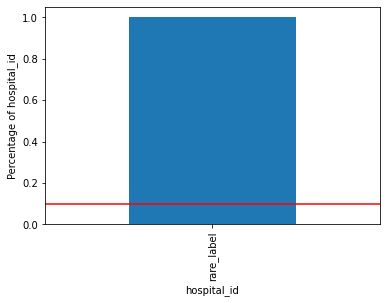

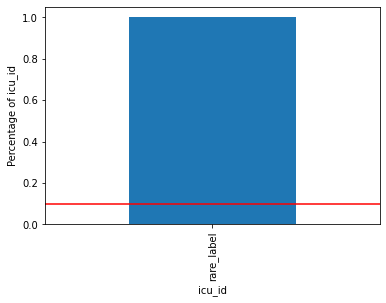

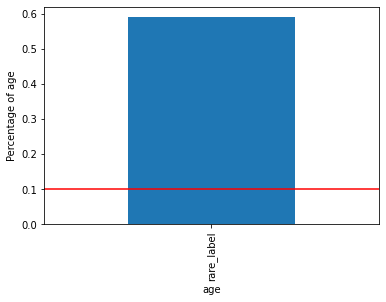

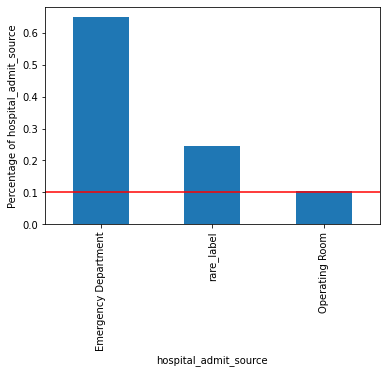

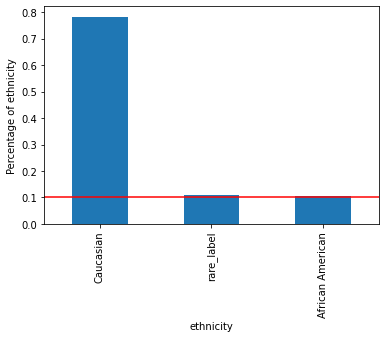

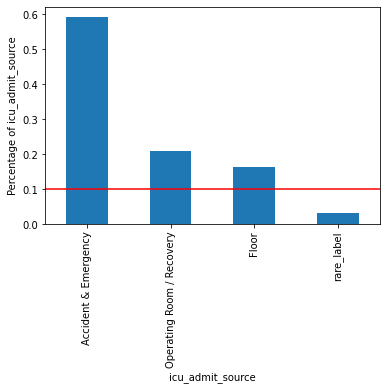

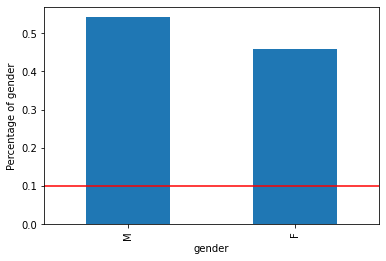

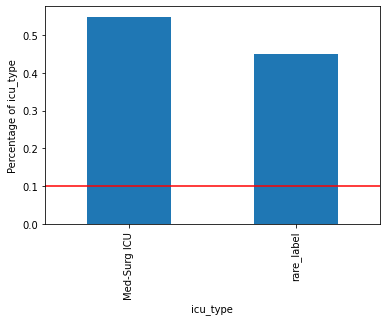

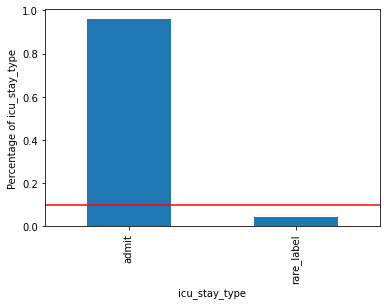

In [60]:
total_labels = len(group_rare)

# for each categorical variable
for col in cat_merged:

    temp_df = pd.Series(group_rare[col].value_counts() / total_labels)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.10, color='red')
    fig.set_ylabel(f'Percentage of {col}')
    plt.show()

In [61]:
group_rare.apply(pd.Series.nunique, axis = 0)

hospital_id              1
icu_id                   1
age                      1
hospital_admit_source    3
ethnicity                3
icu_admit_source         4
gender                   2
icu_type                 2
icu_stay_type            2
dtype: int64

### Check correlation between categorical variables and target variable

In [62]:
#perform chi-square test

from scipy.stats import chi2_contingency
correlated_variables = []
not_correlated_variables = []

for col in group_rare.columns:
        # Cross tabulation between variable and diabetes_mellitus
        result = pd.crosstab(group_rare[col], merged.diabetes_mellitus)
        # Perform Chi-sq test
        chi2_result = round(chi2_contingency(result)[1], 6)
        print('P-Value of the ChiSq-test between', col, 'and diabetes mellitus is:', chi2_result)
        
        if chi2_result < 0.05:
            correlated_variables.append(col)
        else:
            not_correlated_variables.append(col)       
            
print("\n")
print('Variables correlated with diabetes_mellitus:', correlated_variables)     
print('Variables not correlated with diabetes_mellitus:', not_correlated_variables)    
   

P-Value of the ChiSq-test between hospital_id and diabetes mellitus is: 1.0
P-Value of the ChiSq-test between icu_id and diabetes mellitus is: 1.0
P-Value of the ChiSq-test between age and diabetes mellitus is: 1.0
P-Value of the ChiSq-test between hospital_admit_source and diabetes mellitus is: 0.162411
P-Value of the ChiSq-test between ethnicity and diabetes mellitus is: 0.0
P-Value of the ChiSq-test between icu_admit_source and diabetes mellitus is: 0.0
P-Value of the ChiSq-test between gender and diabetes mellitus is: 0.032484
P-Value of the ChiSq-test between icu_type and diabetes mellitus is: 0.416529
P-Value of the ChiSq-test between icu_stay_type and diabetes mellitus is: 0.868811


Variables correlated with diabetes_mellitus: ['ethnicity', 'icu_admit_source', 'gender']
Variables not correlated with diabetes_mellitus: ['hospital_id', 'icu_id', 'age', 'hospital_admit_source', 'icu_type', 'icu_stay_type']


P-Value is the Probability of H0 being True. H0 assumes there is no correlation between the two variables. 
If P-Value > 0.05, we accept the assumption(H0). 
Based on ChiSq- test results, we are going to keep only 3 variable to move forward with: `ethnicity`, `icu_admit_source` and `gender`.

In [63]:
not_correlated_variables

['hospital_id',
 'icu_id',
 'age',
 'hospital_admit_source',
 'icu_type',
 'icu_stay_type']

In [64]:
categorical_clean = group_rare.drop(['hospital_id', 'icu_id', 'hospital_admit_source', 'icu_type', 'icu_stay_type'], axis=1)

categorical_clean.head()

,age,ethnicity,icu_admit_source,gender
0,rare_label,Caucasian,Floor,M
1,rare_label,Caucasian,Floor,F
2,rare_label,Caucasian,Accident & Emergency,F
3,rare_label,Caucasian,Operating Room / Recovery,F
4,rare_label,Caucasian,Accident & Emergency,M


In [65]:
# Change rare_labels
categorical_clean['ethnicity'].replace("rare_label", 
           "Rare ethnicity", 
           inplace=True)

categorical_clean['icu_admit_source'].replace("rare_label", 
           "Rare icu_admit_source", 
           inplace=True)

# Encode categorical variables - Dummy Encoding 

In [66]:
# encode variable ethnicity
encoded_ethnicity = pd.get_dummies(data=categorical_clean['ethnicity'],drop_first=True)
encoded_ethnicity

,Caucasian,Rare ethnicity
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
130152,1,0
130153,1,0
130154,0,0
130155,1,0


In [67]:
# encode variable icu_admit_source
encoded_icu_admit_source = pd.get_dummies(data=categorical_clean['icu_admit_source'],drop_first=True)
encoded_icu_admit_source

,Floor,Operating Room / Recovery,Rare icu_admit_source
0,1,0,0
1,1,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
130152,0,0,0
130153,0,0,0
130154,0,0,0
130155,0,0,0


In [68]:
# Encode gender
encoded_gender = pd.get_dummies(data=categorical_clean['gender'],drop_first=True,)
encoded_gender 

,M
0,1
1,0
2,0
3,0
4,1
...,...
130152,1
130153,0
130154,1
130155,1


- 1 is M
- 0 is F

### Merge encoded categorical variables

In [69]:
categorical_clean = pd.concat([encoded_ethnicity, encoded_icu_admit_source, encoded_gender ], axis=1)

In [70]:
categorical_clean

,Caucasian,Rare ethnicity,Floor,Operating Room / Recovery,Rare icu_admit_source,M
0,1,0,1,0,0,1
1,1,0,1,0,0,0
2,1,0,0,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
130152,1,0,0,0,0,1
130153,1,0,0,0,0,0
130154,0,0,0,0,0,1
130155,1,0,0,0,0,1


## 3. Binary Variables Analysis

In [71]:
binary = binary.drop(['diabetes_mellitus','Unnamed: 0'], axis=1)

In [72]:
binary.dtypes

leukemia                       int64
immunosuppression              int64
cirrhosis                      int64
lymphoma                       int64
aids                           int64
solid_tumor_with_metastasis    int64
hepatic_failure                int64
ventilated_apache              int64
intubated_apache               int64
arf_apache                     int64
apache_post_operative          int64
readmission_status             int64
elective_surgery               int64
dtype: object

<Figure size 360x504 with 0 Axes>

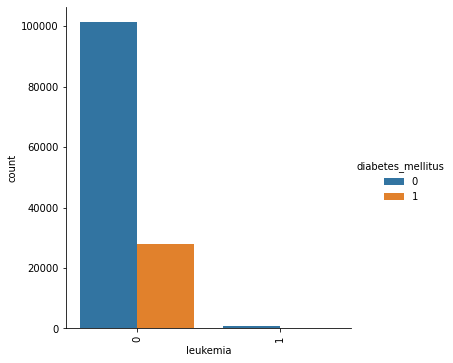

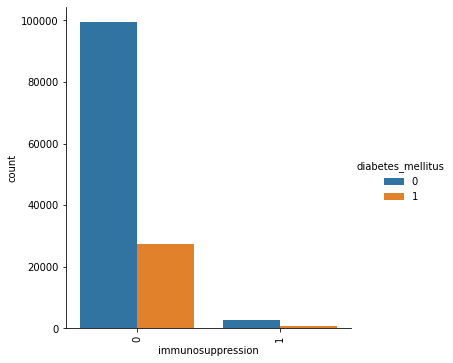

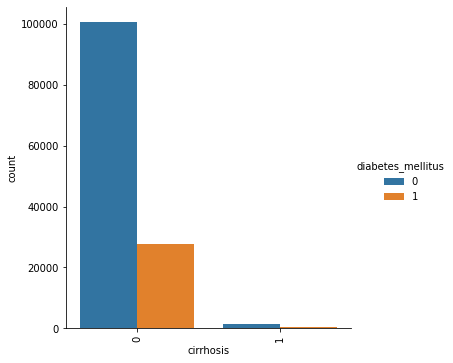

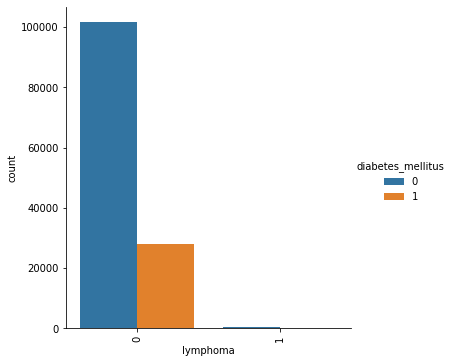

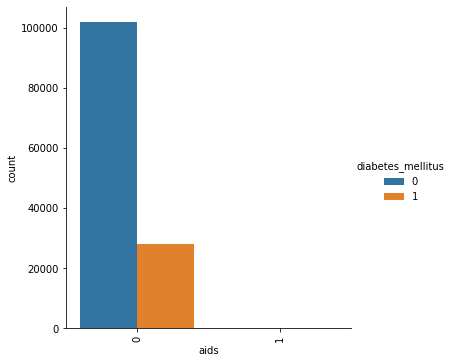

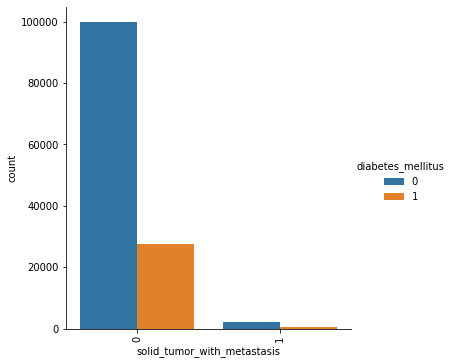

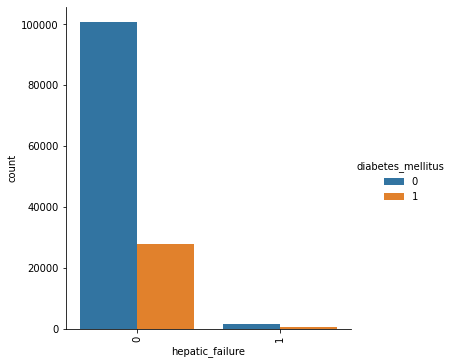

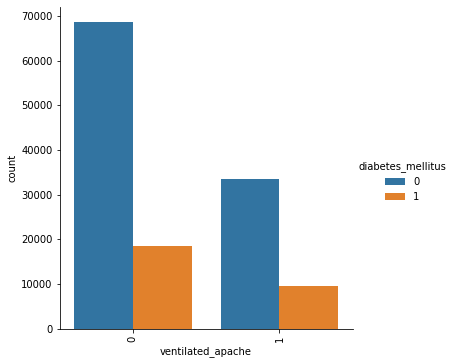

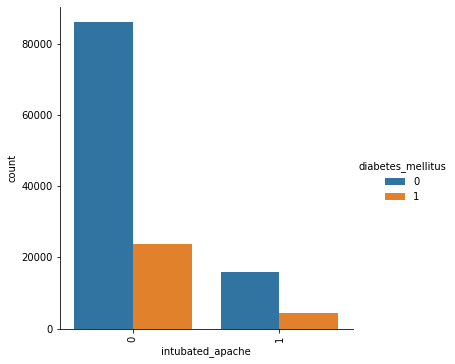

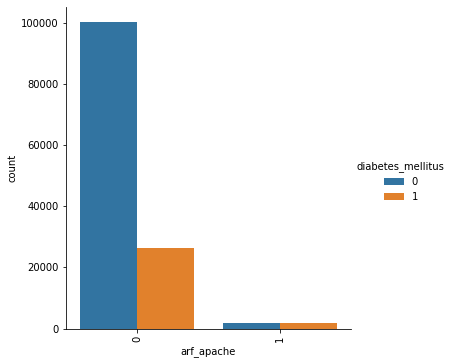

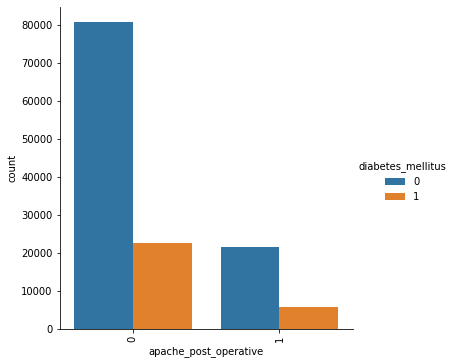

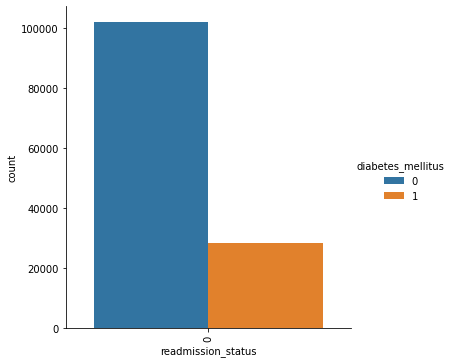

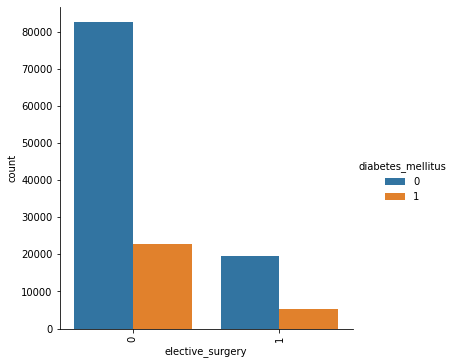

In [73]:
# plot count of labels for each variable

fig = plt.figure(figsize=(5, 7))
for col in binary:
        t = sns.catplot(data = merged, x = col, hue = 'diabetes_mellitus', kind = 'count')
        t.set_xticklabels(rotation=90)
        plt.show()

In [74]:
#perform chi-square test

from scipy.stats import chi2_contingency
correlated_variables = []
not_correlated_variables = []

for col in binary.columns:
        # Cross tabulation between variable and diabetes_mellitus
        result = pd.crosstab(binary[col], merged.diabetes_mellitus)
        # Perform Chi-sq test
        chi2_result = round(chi2_contingency(result)[1], 6)
        print('P-Value of the ChiSq-test between', col, 'and diabetes mellitus is:', chi2_result)
        
        if chi2_result < 0.05:
            correlated_variables.append(col)
        else:
            not_correlated_variables.append(col)       
            
print("\n")
print('Variables correlated with diabetes_mellitus:', correlated_variables)     
print('Variables not correlated with diabetes_mellitus:', not_correlated_variables)    

P-Value of the ChiSq-test between leukemia and diabetes mellitus is: 0.211284
P-Value of the ChiSq-test between immunosuppression and diabetes mellitus is: 0.285124
P-Value of the ChiSq-test between cirrhosis and diabetes mellitus is: 0.0
P-Value of the ChiSq-test between lymphoma and diabetes mellitus is: 0.968788
P-Value of the ChiSq-test between aids and diabetes mellitus is: 0.000242
P-Value of the ChiSq-test between solid_tumor_with_metastasis and diabetes mellitus is: 2e-06
P-Value of the ChiSq-test between hepatic_failure and diabetes mellitus is: 0.000648
P-Value of the ChiSq-test between ventilated_apache and diabetes mellitus is: 1.8e-05
P-Value of the ChiSq-test between intubated_apache and diabetes mellitus is: 0.916132
P-Value of the ChiSq-test between arf_apache and diabetes mellitus is: 0.0
P-Value of the ChiSq-test between apache_post_operative and diabetes mellitus is: 2.3e-05
P-Value of the ChiSq-test between readmission_status and diabetes mellitus is: 1.0
P-Value of

In [75]:
binary_clean = merged[correlated_variables]

# Merge the variables that seem to have an impact on predicting the target variable:
1. 14 numerical variables
2.  3 categorical variables (+3 from encoding)
3.  7 binary variables 
5.  1 target variable

In [76]:
target = merged['diabetes_mellitus']
target.shape

(130157,)

In [77]:
categorical_clean.shape

(130157, 6)

In [78]:
numerical_clean.shape

(130157, 14)

In [79]:
binary_clean.shape

(130157, 7)

In [80]:
final_df = pd.concat([numerical_clean, categorical_clean, binary_clean, target], axis=1) 

In [81]:
final_df.shape

(130157, 28)

In [82]:
final_df.head()

,hematocrit_apache,bun_apache,creatinine_apache,glucose_apache,d1_potassium_max,d1_glucose_min,h1_diasbp_min,age,bmi,d1_sysbp_noninvasive_max,...,Rare icu_admit_source,M,cirrhosis,aids,solid_tumor_with_metastasis,hepatic_failure,ventilated_apache,arf_apache,apache_post_operative,diabetes_mellitus
0,27.400000,31.00000,2.510000,168.000000,4.000000,109.00000,63.0,118.0,22.732803,131.0,...,0,1,0,0,0,0,0,0,0,1
1,36.900000,9.00000,0.560000,145.000000,4.200000,128.00000,48.0,81.0,27.421875,159.0,...,0,0,0,0,0,0,1,0,0,1
2,32.975817,25.71807,1.481629,160.141416,4.253053,114.44031,58.0,118.0,31.952749,148.0,...,0,0,0,0,0,0,0,0,0,0
3,25.900000,25.71807,1.481629,185.000000,5.000000,88.00000,44.0,118.0,22.635548,158.0,...,0,0,0,0,0,0,1,0,1,0
4,32.975817,25.71807,1.481629,160.141416,4.253053,114.44031,68.0,33.0,29.110260,147.0,...,0,1,0,0,0,0,0,0,0,0


In [83]:
final_df = pd.get_dummies(final_df)
final_df.head()

,hematocrit_apache,bun_apache,creatinine_apache,glucose_apache,d1_potassium_max,d1_glucose_min,h1_diasbp_min,bmi,d1_sysbp_noninvasive_max,apache_3j_diagnosis,...,age_120.0,age_121.0,age_122.0,age_123.0,age_124.0,age_125.0,age_126.0,age_127.0,age_128.0,age_129.0
0,27.400000,31.00000,2.510000,168.000000,4.000000,109.00000,63.0,22.732803,131.0,502.01,...,0,0,0,0,0,0,0,0,0,0
1,36.900000,9.00000,0.560000,145.000000,4.200000,128.00000,48.0,27.421875,159.0,203.01,...,0,0,0,0,0,0,0,0,0,0
2,32.975817,25.71807,1.481629,160.141416,4.253053,114.44031,58.0,31.952749,148.0,703.03,...,0,0,0,0,0,0,0,0,0,0
3,25.900000,25.71807,1.481629,185.000000,5.000000,88.00000,44.0,22.635548,158.0,1206.03,...,0,0,0,0,0,0,0,0,0,0
4,32.975817,25.71807,1.481629,160.141416,4.253053,114.44031,68.0,29.110260,147.0,601.01,...,0,0,0,0,0,0,0,0,0,0


# Perform SMOTE to balance the classes 

In [84]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import collections

def balancingClasses_Smote(train_x, train_y,random_state):

    # Using SMOTE to to balance our training data points
    sm = SMOTE(random_state=random_state)
    features_balanced, target_balanced = sm.fit_resample(train_x, train_y)

    print("Count for each class value after SMOTE:", collections.Counter(target_balanced))

    return features_balanced, target_balanced

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# define independent variables and dependent variables
x1 = final_df.drop(columns=['diabetes_mellitus'],axis=1)
y1 = final_df['diabetes_mellitus']

X_train, X_test, y_train, y_test = train_test_split(x1,
                                                    y1,
                                                    test_size=0.2,
                                                    stratify=y1,
                                                    random_state=11)



X_balanced_train, y_balanced_train =  balancingClasses_Smote(X_train, y_train, 30)


Count for each class value after SMOTE: Counter({1: 81604, 0: 81604})


# Build Model

In [86]:
# apply XGBClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

xgbc = XGBClassifier()
xgbc.fit(X_balanced_train, y_balanced_train)
predict_train = xgbc.predict(X_balanced_train)
predict_test = xgbc.predict(X_test)

# Actual and Predicted test set - dataframe
y_Actual = np.array(y_test) # actual
y_Predicted = predict_test # predicted

# Performance metrics
print(classification_report(y_Actual, y_Predicted))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     20402
           1       0.50      0.60      0.54      5630

    accuracy                           0.78     26032
   macro avg       0.69      0.72      0.70     26032
weighted avg       0.80      0.78      0.79     26032



In [87]:
# apply LogisticRegression

from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression()
lrg.fit(X_balanced_train, y_balanced_train)

predict_train = lrg.predict(X_balanced_train)
predict_test = lrg.predict(X_test)

# Actual and Predicted test set - dataframe
y_Actual = np.array(y_test) # actual
y_Predicted = predict_test # predicted

# Performance metrics
print(classification_report(y_Actual, y_Predicted))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.88      0.74      0.80     20402
           1       0.40      0.64      0.49      5630

    accuracy                           0.72     26032
   macro avg       0.64      0.69      0.65     26032
weighted avg       0.78      0.72      0.74     26032



In [88]:
# apply RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_balanced_train, y_balanced_train)

predict_train_rfc = rfc.predict(X_balanced_train)
predict_test = rfc.predict(X_test)

# Actual and Predicted test set - dataframe
y_Actual = np.array(y_test) # actual
y_Predicted = predict_test # predicted


# Performance metrics
print(classification_report(y_Actual, y_Predicted))


              precision    recall  f1-score   support

           0       0.87      0.88      0.88     20402
           1       0.55      0.53      0.54      5630

    accuracy                           0.80     26032
   macro avg       0.71      0.71      0.71     26032
weighted avg       0.80      0.80      0.80     26032



# Hyperparameter tunning for XGBoost and Random Forest

In [89]:
# XGboost tunning
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

xgb = XGBClassifier()

xgb_param_grid = {
    'n_estimators':[100, 200, 300],
    'learning_rate':[0.1,0.2, 0.3],
    'subsample': [1,2,3],
    'max_depth': [1,2,3,6] 
    
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_balanced_train, y_balanced_train)

**XGBoost GridSearch results**

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)
{'learning_rate': 0.3, 'max_depth': 6, 'subsample': 1.0}

In [90]:
params = {'learning_rate': 0.3, 'max_depth': 6, 'subsample': 1.0}

xgbc = XGBClassifier(**params)
xgbc.fit(X_balanced_train, y_balanced_train)
predict_train = xgbc.predict(X_balanced_train)
predict_test = xgbc.predict(X_test)

# Actual and Predicted test set - dataframe
y_Actual = np.array(y_test) # actual
y_Predicted = predict_test # predicted

# Performance metrics
print(classification_report(y_Actual, y_Predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     20402
           1       0.61      0.48      0.54      5630

    accuracy                           0.82     26032
   macro avg       0.74      0.70      0.71     26032
weighted avg       0.81      0.82      0.81     26032



In [91]:
# Gridsearch for Random Forest

from numpy import mean
from sklearn.datasets import make_classification

forest = RandomForestClassifier()


n_estimators = [100, 200, 300]
max_depth = [5, 8, 15]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

best_classifier = bestF.best_estimator_
best_parameters = bestF.best_params_
print(best_classifier)
print(best_parameters)

**Random Forest GridSearch results**

*Fitting 3 folds for each of 54 candidates, totalling 162 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 55.6min finished
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)*

*{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}*

In [92]:
params = {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

forest = RandomForestClassifier(**params)
forest.fit(X_balanced_train, y_balanced_train)

predict_train = forest.predict(X_balanced_train)
predict_test = forest.predict(X_test)

# Actual and Predicted test set - dataframe
y_Actual = np.array(y_test) # actual
y_Predicted = predict_test # predicted

print(classification_report(y_Actual, y_Predicted))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     20402
           1       0.50      0.62      0.56      5630

    accuracy                           0.78     26032
   macro avg       0.70      0.73      0.71     26032
weighted avg       0.80      0.78      0.79     26032



In [93]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_Actual, y_Predicted)
print(cf_matrix)

[[16940  3462]
 [ 2135  3495]]


Text(0.5, 1.0, 'Confusion Matrix - Test Data Set')

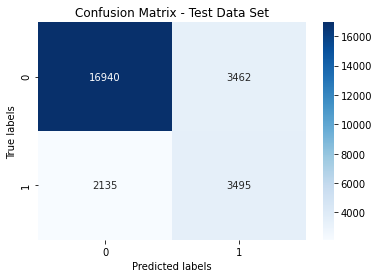

In [94]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_ylim(2, 0)
ax.set_title('Confusion Matrix - Test Data Set')

# Feature importance

In [95]:
#conda install -c conda-forge shap

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


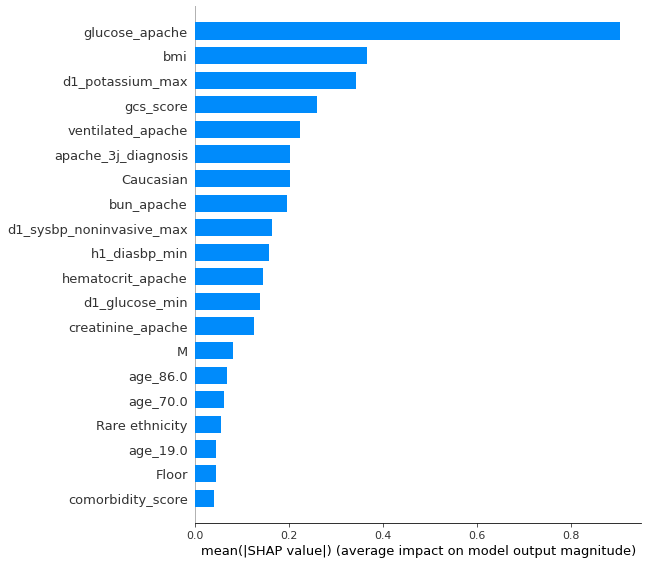

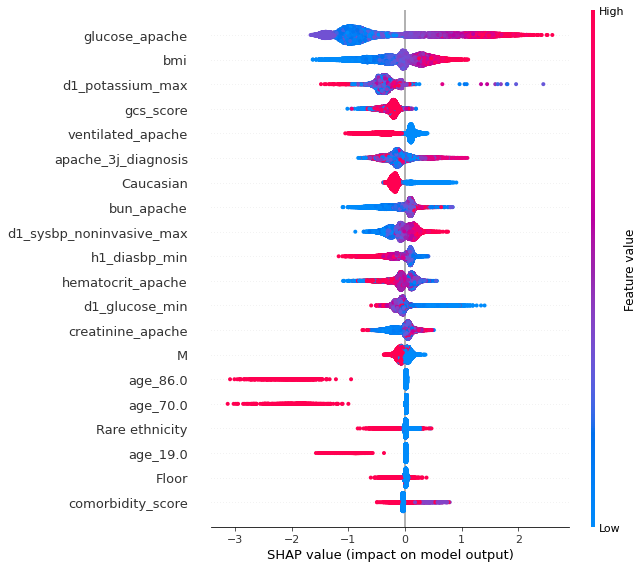

In [96]:
import shap
explainer = shap.TreeExplainer(xgbc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",
                  title = "")

shap.summary_plot(shap_values, X_test)